In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from  sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn import preprocessing 
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import matplotlib.pyplot as plt 
%matplotlib inline

In [0]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link ="https://drive.google.com/open?id=1b8cohg1rRM2Cdy6nqFxKKVr5CPxU_9tJ"  
fluff, id = link.split('=')

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Energy Data Set - Sheet1.csv')   

In [0]:
energy1=pd.read_csv("Energy Data Set - Sheet1.csv")

In [0]:
energy1.head()

,Year,GDP (Constant LCU) - may 2018,Population,Export (Constant LCU) - may 2018,Import (Constant LCU) - may 2018,Primary Energy Production (million metric tons of oil eq.),Electric Power Consumption (kWh per capita),CO2 Emissions total (kt),Energy use (kg of oil equivalent per capita),Electricity generation by Biomass and Waste (kwh),Electricity generation by (kWh) Coal,Electricity generation by (kWh) Gas,Electricity generation by (kWh) Geothermal,Electricity generation by (kWh) Hydroelectric,Electricity generation by (kWh) Nuclear,Electricity generation by (kWh) Oil,Electricity generation by (kWh) Solar Tide Wave,Electricity generation by (kWh) Wind,Total electricity Production (kWh),"Energy imports, net (% of energy use)",Fossil fuel energy consumption (% of total),Power Generation Capacities (kW) Biomass and Waste,Power Generation Capacities (kW) Fossil Fuels,Power Generation Capacities (kW) Hydroelectric,Power Generation Capacities (kW) Nuclear,Power Generation Capacities (kW) Solar Tide Wave,Power Generation Capacities (kW) Wind,Total Power Generation Capacities (kW)
0,1960,6762527811600,449480608,293247312000,491436781700,0.0,0.0,120581.961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0.0
1,1961,7014279310800,458494963,292702243800,443492695200,0.0,0.0,130402.187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0.0
2,1962,7219876797200,467852537,291005064800,460829780000,0.0,0.0,143467.708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0.0
3,1963,7652661717400,477527970,315461357100,476461074600,0.0,0.0,154083.673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0.0
4,1964,8223010778200,487484535,294918356800,492564233300,0.0,0.0,150647.694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0.0


In [0]:
energy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 28 columns):
Year                                                           57 non-null int64
GDP (Constant LCU) - may 2018                                  57 non-null int64
Population                                                     57 non-null int64
Export (Constant LCU) - may 2018                               57 non-null int64
Import (Constant LCU) - may 2018                               57 non-null int64
Primary Energy Production (million metric tons of oil eq.)     53 non-null float64
Electric Power Consumption (kWh per capita)                    56 non-null float64
CO2 Emissions total (kt)                                       55 non-null float64
Energy use (kg of oil equivalent per capita)                   55 non-null float64
Electricity generation by Biomass and Waste (kwh)              55 non-null float64
Electricity generation by (kWh) Coal                           55 non-null fl

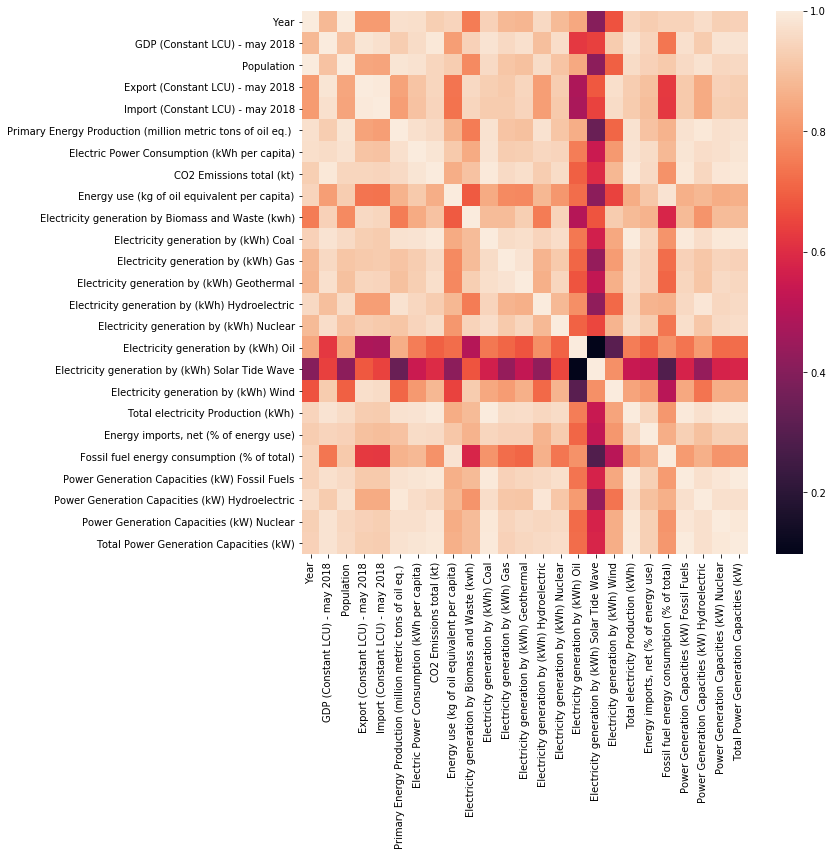

In [0]:
plt.subplots(figsize=(10,10))
sns.heatmap(energy1.corr())

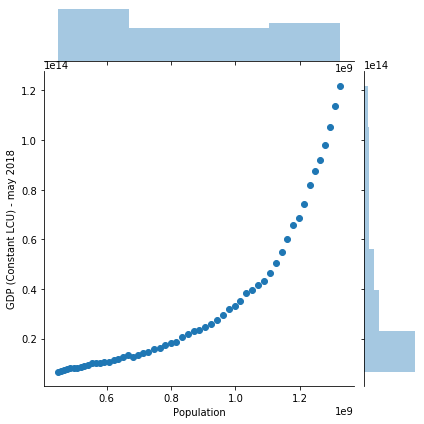

In [0]:
# m= sns.PairGrid(energy1)
# m.map(plt.scatter)
sns.jointplot(x="Population",y="GDP (Constant LCU) - may 2018", data=energy1 , kind="scatter")

In [0]:
energy=energy1.fillna(energy1.mean())           #  ** this is how you fill Nan values with mean value of the column.

In [0]:
X= energy.drop("GDP (Constant LCU) - may 2018", axis=1)

In [0]:
Y=energy['GDP (Constant LCU) - may 2018']


In [0]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(X,Y,random_state=0)


x_train1.drop("Power Generation Capacities (kW) Biomass and Waste",axis=1,inplace=True)
x_train1.drop("Power Generation Capacities (kW) Solar Tide Wave",axis=1,inplace=True)
x_train1.drop("Power Generation Capacities (kW) Wind",axis=1,inplace=True)

x_test1.drop("Power Generation Capacities (kW) Biomass and Waste",axis=1,inplace=True)
x_test1.drop("Power Generation Capacities (kW) Solar Tide Wave",axis=1,inplace=True)
x_test1.drop("Power Generation Capacities (kW) Wind",axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
scaler= StandardScaler()

In [0]:
x1=scaler.fit_transform(x_train1)
x2=scaler.transform(x_test1)

In [0]:
x_train= pd.DataFrame(data=x1)            # ** this is how you convert numpy.ndarray to pandas dataframe. ** 
x_train

x_test=pd.DataFrame(data=x2)
x_test



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.458819,0.427218,-0.310930,-0.276264,0.609664,0.351905,0.124993,0.385562,-0.609985,0.229643,-0.065759,-0.151880,0.420329,-0.171256,0.240057,-0.279997,-0.449791,0.191648,0.040987,0.640730,0.283692,0.266584,0.130009,0.213789
1,0.397643,0.359548,-0.409316,-0.373467,0.651307,0.257713,0.047879,0.309174,-0.609985,0.106321,-0.255195,-0.230806,0.634112,-0.356093,0.154687,-0.279997,-0.484386,0.106108,-0.043561,0.560446,0.237517,0.256291,0.013045,0.176407
2,0.825874,0.838138,-0.014715,-0.038288,0.782725,0.590229,0.503043,0.555357,0.722223,0.643819,0.591180,0.924902,0.443562,1.079054,1.554024,-0.270566,-0.263841,0.634972,0.733506,0.789631,0.618029,0.605640,0.597865,0.527302
3,-0.030588,-0.104745,-0.564280,-0.549746,0.046060,-0.255267,-0.407002,0.048060,-0.609985,-0.324874,-0.694390,-0.574700,-0.109972,-0.353969,0.024775,-0.279997,-0.506008,-0.344092,-0.659669,0.221511,-0.229357,0.061350,-0.233195,-0.200225
4,-1.009401,-1.032386,-0.661675,-0.653673,-1.091510,-1.202642,-0.872358,-0.264522,-0.609985,-0.913923,-0.799690,-0.774835,-1.111534,-0.857492,-1.073909,-0.279997,-0.506008,-0.935294,-0.283621,-0.370984,-0.945745,-1.083846,-0.941135,-0.945891
5,-1.559984,-1.396575,-0.683330,-0.665353,-1.091510,-1.202642,-0.975110,-1.737326,-0.609985,-0.913923,-0.799690,-0.774835,-1.111534,-0.857492,-1.073909,-0.279997,-0.506008,-0.935294,-1.245902,-1.799766,-0.945745,-1.083846,-0.941135,-0.945891
6,0.336467,0.292367,-0.445475,-0.437178,0.392925,0.184287,-0.019688,0.272205,-0.609985,0.060348,-0.355204,-0.467585,0.375569,-0.231806,0.064367,-0.279997,-0.496278,0.027924,-0.064495,0.517415,0.166546,0.227339,0.019201,0.120151
7,1.743511,1.773649,2.639548,2.274888,0.002932,-0.003628,-0.050636,-0.040517,-0.092673,-0.039792,-0.066774,-0.063113,-0.013030,-0.062941,-0.023951,-0.064123,-0.074314,-0.041680,-0.067608,-0.020991,-0.029327,-0.023856,-0.038666,-0.032980
8,-0.336467,-0.426554,-0.588873,-0.595479,-0.287286,-0.511021,-0.635625,-0.094628,-0.609985,-0.587225,-0.747834,-0.755103,-0.081837,-0.642910,-0.153390,-0.279997,-0.506008,-0.540669,-0.599960,-0.049370,-0.512903,-0.192781,-0.430187,-0.455766
9,1.682335,1.717682,2.494402,2.207371,0.002932,2.454238,-0.050636,-0.040517,-0.092673,-0.039792,-0.066774,-0.063113,-0.013030,-0.062941,-0.023951,-0.064123,-0.074314,-0.041680,-0.067608,-0.020991,-0.029327,-0.023856,-0.038666,-0.032980


In [0]:
scaler2=preprocessing.MinMaxScaler()

In [0]:
#y_train2=pd.DataFrame(data=y_train1)
#y_test2=pd.DataFrame(data=y_test1)


y_train2=y_train1.to_numpy()                            #  ** this is how you convert pandas series to numpy array. 
y_test2=y_test1.to_numpy()

y_train3=scaler2.fit_transform(y_train2.reshape(-1,1))
y_test3=scaler2.transform(y_test2.reshape(-1,1))

# y1=pd.DataFrame(data=y_train)
# y2=pd.DataFrame(data=y_test)

y3=y_train3.ravel()
y4=y_test3.ravel()

# y3.shape
# type(y3)

y_train = pd.Series(y3)                           # **  this is how you convert numpy array to pandas Series. 
y_test = pd.Series(y4)



In [0]:
# x_train ,x_test ,y_train1, y_test1

x_train.shape

(42, 24)

In [0]:
class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(24, 48)
        self.fc2 = nn.Linear(48, 24)
        self.fc3 = nn.Linear(24, 1)
        # self.fc4 = nn.Linear(12, 6)
        # self.fc5 = nn.Linear(6,3)
        # self.fc6 = nn.Linear(3,1)

        #self.dropout = nn.Dropout(p=0.1)

    def forward(self, x):

        #x = self.dropout(F.relu(self.fc1(x)))
        #x = self.dropout(F.relu(self.fc2(x)))
        #x = self.dropout(F.relu(self.fc3(x)))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        # x = F.relu(self.fc4(x))
        # x=  F.relu(self.fc5(x))
        # x=  F.relu(self.fc6(x))

        return x

In [0]:
x_train.shape

(42, 24)

In [0]:
train_batch = np.array_split(x_train, 1)          # this 1/n indicate that array should be splitted into 1/n parts.  
label_batch = np.array_split(y_train, 1)

#here numpy array is converted into list object 

type(train_batch[0])

pandas.core.frame.DataFrame

In [0]:
for i in range(len(train_batch)):
    train_batch[i] = torch.from_numpy(train_batch[i].values).float()


for i in range(len(label_batch)):
    label_batch[i] = torch.from_numpy(label_batch[i].values).float().view(-1, 1)


X_val = torch.from_numpy(x_test.values).float()
y_val = torch.from_numpy(y_test.values).float().view(-1, 1)

X_val.shape


torch.Size([15, 24])

In [0]:
model = Regressor()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 500

train_losses, test_losses = [], []
for e in range(epochs):
    model.train()
    train_loss = 0
    for i in range(len(train_batch)):
        optimizer.zero_grad()
        output = model(train_batch[i])
        loss = torch.sqrt(criterion(output, label_batch[i]))
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        with torch.no_grad():
            model.eval()
            predictions = model(X_val)
            test_loss += torch.sqrt(criterion(predictions, y_val))
                
        train_losses.append(train_loss/len(train_batch))
        test_losses.append(test_loss)

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_loss/len(train_batch)),
              "Test Loss: {:.3f}.. ".format(test_loss))

Epoch: 1/500..  Training Loss: 0.232..  Test Loss: 0.292.. 
Epoch: 2/500..  Training Loss: 0.044..  Test Loss: 0.267.. 
Epoch: 3/500..  Training Loss: 0.217..  Test Loss: 0.264.. 
Epoch: 4/500..  Training Loss: 0.161..  Test Loss: 0.278.. 
Epoch: 5/500..  Training Loss: 0.034..  Test Loss: 0.316.. 
Epoch: 6/500..  Training Loss: 0.113..  Test Loss: 0.329.. 
Epoch: 7/500..  Training Loss: 0.151..  Test Loss: 0.327.. 
Epoch: 8/500..  Training Loss: 0.144..  Test Loss: 0.316.. 
Epoch: 9/500..  Training Loss: 0.111..  Test Loss: 0.302.. 
Epoch: 10/500..  Training Loss: 0.062..  Test Loss: 0.286.. 
Epoch: 11/500..  Training Loss: 0.020..  Test Loss: 0.277.. 
Epoch: 12/500..  Training Loss: 0.054..  Test Loss: 0.274.. 
Epoch: 13/500..  Training Loss: 0.064..  Test Loss: 0.276.. 
Epoch: 14/500..  Training Loss: 0.046..  Test Loss: 0.283.. 
Epoch: 15/500..  Training Loss: 0.019..  Test Loss: 0.291.. 
Epoch: 16/500..  Training Loss: 0.046..  Test Loss: 0.295.. 
Epoch: 17/500..  Training Loss: 0

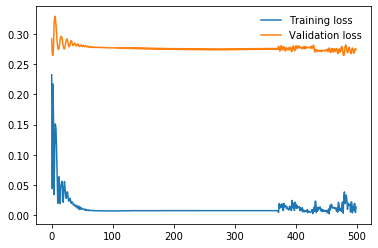

In [0]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)